## Sentiment Analysis with 55.000 Tweets


### Introduction

Text can be presented in two different styles: formal and informal writing style. A text may contain a lot of emotion, ideas or feelings. Twitter texts are generally informal and depending on the topic, they contain emotions of the writers. Social media users can freely express their feelings, views, opinions and emotion on social networking site. Short messages like SMS, tweets or Facebook messages are also useful source for sentiment analysis. Because of length constraints in these messages, Opinion Mining might be a bit difficult.

The scope of this project is to predict the sentiment of a short twitter text and categorize them over 3 sentiments (positive, negative, neutral). Since the twitter texts are simple, short, informal and contain creative spelling and punctuation, misspellings, slang, new words or URLs ; handling with that type of text would be harder to classify in terms of sentiments. Thus, analyzing and categorizing the emotional content of twitter text data is an important solution to create a corpus of tweets and texts with sentiment expressions.

### Summary of the Project

Client:

Companies/ Organizations using social media: Sentiment analysis is crucial for the companies that use the feedback of their customers about their products or service. That gives valuable insights to the businesses regarding how people feel about their product brand or service.
Social Media Influencers: It helps to identify when potential negative threads are emerging online regarding a business, thereby allowing to be proactive in dealing with the source of negativities more quickly.
Ecommerce traders whose trade mostly depend on the reviews and ratings.

Data Set: 

Data Set includes 4 features and 55.000 data points/samples. Features are: Tweet ID,
 Sentiment, Author, and Content.
 This dataset contains labels for the emotional content (such as happiness, sadness, and
 anger) of texts.
 
Target Feature is ‘sentiment’ 

### Approach

Our target feature is ‘sentiment’ and it has 13 emotion labels. After evaluating among those emotions, we planned to limit the emotions to 3 sentiments positive: neutral and negative.

Anger, boredom, hate, worry, sadness: Negative 

Happiness, fun, love, surprise, enthusiasm, relief: Positive 

Empty, neutral : Neutral

#### Importing necessary Modules and Reading Files

In [1]:
# Import necessary modules

import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

from nltk.tokenize import WordPunctTokenizer
import re
from bs4 import BeautifulSoup

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Display 100 characters max within a cell
pd.set_option('max_colwidth',200)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Administrator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Administrator/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Administrator/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Read data
df = pd.read_csv('text_emotion.csv')

## Data Understanding and Preprocessing

First, we should see the general display of our data

In [3]:
df.head(10)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!"
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?


It looks like there are lots of different characters, creative spelling and punctuation, misspellings, slang, new words or URLs. This needs to be fixed

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


There are no empty rows, no need to fill/delete NAN values

In [5]:

# Print the count and the ratio of the emotions
pd.DataFrame([df.sentiment.value_counts(), df.sentiment.value_counts(normalize=True)]).T

,sentiment,sentiment
neutral,8638.0,0.215950
worry,8459.0,0.211475
happiness,5209.0,0.130225
sadness,5165.0,0.129125
love,3842.0,0.096050
surprise,2187.0,0.054675
fun,1776.0,0.044400
relief,1526.0,0.038150
hate,1323.0,0.033075
empty,827.0,0.020675


Lets see the group of sentiments on a graph

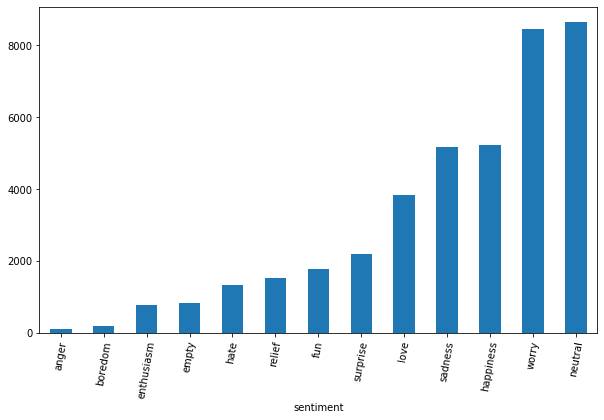

In [6]:
plt.subplots(figsize=(10,6))

df.groupby('sentiment')['content'].count().sort_values(ascending=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

In [7]:
df.describe(include='object')

,sentiment,author,content
count,40000,40000,40000
unique,13,33871,39827
top,neutral,MissxMarisa,I just received a mothers day card from my lovely daughter wishing my a happy mothers day http://tr.im/kWK9
freq,8638,23,14


We should check for missing values in our data set

In [8]:
df.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

No missing values

In [9]:
df.content.duplicated().sum()

173

It looks like there are duplicated tweets (which could be retweets maybe) that needs to be taken into consideration

In [10]:
df.content.value_counts()[df.content.value_counts()>1]

I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9                              14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone                                               13
Happy Mothers Day                                                                                                                         10
Happy Mother's Day!                                                                                                                       10
happy mother's day                                                                                                                         8
                                                                                                                                          ..
http://www.facebook.com/pages/HelloTxt/73275306275 this message is posted on HelloTxt Facebook Fan page through HelloTxt, check it out     2
Just cleaned 

In [11]:
df[df.content=='happy mothers day']

,tweet_id,sentiment,author,content
29348,1751177832,love,jadeeisabel,happy mothers day
36768,1753366853,love,janethglz,happy mothers day
36819,1753381594,happiness,bree_gee,happy mothers day
37340,1753468050,love,starbuckscup,happy mothers day
39131,1753773088,neutral,vwebling,happy mothers day


For the same tweet there are different sentiments in the sentiment column. I decided to drop these duplicates and different labels

In [12]:
df=df.drop_duplicates(subset='content')

In [13]:
df.content.duplicated().sum()

0

Now lets see the distribution of emotions in the data set

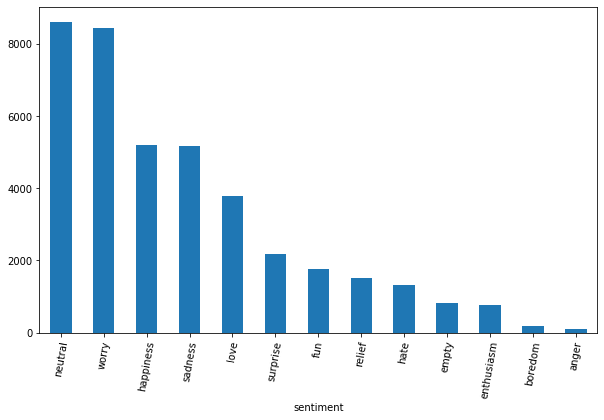

In [14]:
plt.subplots(figsize=(10,6))

df.groupby('sentiment')['content'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

The emotion 'empty' looks different, lets see what is empty 

In [15]:
df[df.sentiment == 'empty'].sample(10)

,tweet_id,sentiment,author,content
15465,1964846406,empty,lauraeatworld,@gabigail87 aww :/ kk I need to do a huge shopping trip at joshstore to get you also a joshmobile.. pft.
6388,1961245370,empty,BrandySanDiego,I've only been up for an hour and today already sucks
34358,1752847740,empty,adrianna321,Watching jackass the movie http://twitpic.com/4wlgi
30405,1751574419,empty,hadyngreen,@maetl Doing a Rainbow and Unicorn film then? #48hours
7382,1961655660,empty,Mallmus,"@LacesOutDan nah, he was acting like a dick - his show sucked last night"
25529,1695134891,empty,Natss09,is making a cuppa coffeee
22400,1694420567,empty,StevenMcD,"@cathjenkin when I see all the moms' on twitter and their tweets, I know its gonna be worth ir"
37829,1753551121,empty,IIanS,@Weezul my friend it's 5:10am here and can't fall asleep I need to be counting sheep too ha
23156,1694568114,empty,GemmaCocker,@dawizonline got ya - that wouldn't be so bad tho right?
37678,1753532220,empty,queo,@idolart Good morning


There are different emotions that are categorized es 'empty', even though they should be 'bored', 'happy' or 'sad'. To deal with this, we could clean empty tweets

In [16]:
df=df[df.sentiment!='empty']
df.shape

(39005, 4)

### Cleaning the tweet texts

We defined a tweet cleaner function for removing special characters, punctuations, accented chracters, html tags in order to prepare the text for our models

In [17]:
import string

def tweet_cleaner(tweet):
    
    # To lowercase 
    tweet = tweet.lower()
    
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    
    #Convert @username to "@user"
    tweet = re.sub('@[^\s]+','@user',tweet)
    
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    
    # Remove hyperlinks 
    tweet = re.sub(r'https?:\/\/.*\/\w*', 'http', tweet)
    
    # Remove tickers such as USD ($)
    tweet = re.sub(r'\$\w*', '', tweet)
    
    # Remove hashtags 
    tweet = re.sub(r'#\w*', '', tweet)
    
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet  = "".join([char for char in tweet if char not in string.punctuation])
    tweet = re.sub('[0-9]+', ' ', tweet)
    
#     # Spell correction

#     tweet = [speller(w) for w in (nltk.word_tokenize(tweet))]
#     tweet = " ".join(tweet)

    return tweet

In [18]:

df['Cleaned'] = df.content.apply(tweet_cleaner)
df.head(10)

,tweet_id,sentiment,author,content,Cleaned
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,layin n bed with a headache ughhhhwaitin on your call
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends soon
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",user we want to trade with someone who has houston tickets but no one will
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,repinging user why didnt you go to prom bc my bf didnt like my friends
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!",i should be sleep but im not thinking about an old friend who i want but hes married now damn he wants me scandalous
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down,hmmm http is down
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you,user charlene my love i miss you
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,user im sorry at least its friday
10,1956969456,neutral,feinyheiny,cant fall asleep,cant fall asleep


### Removing the stopwords

In [19]:
stop = stopwords.words('english')
df['Cleaned'] = df['Cleaned'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df.head(10)

,tweet_id,sentiment,author,content,Cleaned
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,layin n bed headache ughhhhwaitin call
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants hang friends soon
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",user want trade someone houston tickets one
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,repinging user didnt go prom bc bf didnt like friends
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!",sleep im thinking old friend want hes married damn wants scandalous
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down,hmmm http
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you,user charlene love miss
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,user im sorry least friday
10,1956969456,neutral,feinyheiny,cant fall asleep,cant fall asleep


Lemmatizing the text with wordnet lemmatizer

In [20]:
wordnet_lemmatizer=WordNetLemmatizer()

df.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in stop]]).most_common(5))

sentiment
anger                        [(get, 9), (quot, 8), (know, 8), (day, 7), (work, 7)]
boredom                [(bored, 27), (im, 19), (work, 15), (really, 12), (go, 12)]
enthusiasm                [(go, 57), (good, 55), (want, 52), (get, 49), (day, 49)]
fun                 [(lol, 184), (fun, 142), (quot, 123), (day, 122), (good, 113)]
happiness     [(day, 679), (good, 559), (happy, 401), (thanks, 297), (great, 296)]
hate                  [(hate, 232), (suck, 95), (like, 94), (work, 89), (get, 85)]
love           [(love, 909), (day, 749), (happy, 546), (mother, 541), (good, 320)]
neutral              [(http, 548), (day, 425), (get, 392), (quot, 386), (go, 381)]
relief              [(day, 172), (good, 126), (thanks, 94), (got, 90), (time, 85)]
sadness              [(day, 427), (sad, 374), (miss, 353), (work, 340), (go, 324)]
surprise              [(quot, 167), (day, 143), (get, 128), (oh, 117), (got, 106)]
worry                 [(get, 566), (day, 532), (go, 479), (like, 457), (got, 

### Let's apply a common words filter for removing most common words 

We defined a filter function that will define the most and least common and uncommon text and filter them according to the parameters that we choose

In [21]:
import pickle

MIN_NUMBER_OF_SR = 500
MIN_COM_WORDS = 0.01
MIN_UNCOM_WORDS = 0.01
UNCOM_WORDS = 0.01
dataframe = df
pivot_feature = 'sentiment'
text_feature = 'Cleaned'

def common_word_filter (dataframe, pivot_feature, text_feature):
    
    NUM_OF_SUB_TECH = len(dataframe[pivot_feature].value_counts()[dataframe[pivot_feature].value_counts() > MIN_NUMBER_OF_SR].index.tolist())
    
    list_common = []
    
    list_uncommon =[]
    
    list_least_common = []
    
    for sub_tech in dataframe[pivot_feature].value_counts()[dataframe[pivot_feature].value_counts() > MIN_NUMBER_OF_SR].index.tolist():
        
        cleaned_text = [str(txt) for text in dataframe[dataframe[pivot_feature] == sub_tech][text_feature] for txt in text.split(' ') if len(txt) > 2 and txt not in ' ']
        
        word_dist = nltk.FreqDist(cleaned_text)
        
        list_common.append([x[0] for x in word_dist.most_common(int(len(word_dist)*MIN_COM_WORDS))])
        
        list_uncommon.append([x[0] for x in word_dist.most_common(len(word_dist))[-int(len(word_dist)*MIN_UNCOM_WORDS):]])
        
        list_least_common.append([x[0] for x in word_dist.most_common(len(word_dist))[-int(len(word_dist)*UNCOM_WORDS):]])
    
    list_common_fl = [x for y in list_common for x in y]
    
    list_uncommon_fl = [x for y in list_uncommon for x in y]
    
    word_dist_com = nltk.FreqDist(list_common_fl)
    
    word_dist_ucom = nltk.FreqDist(list_uncommon_fl)
    
    list_final_com = [x[0] for x in word_dist_com.most_common(len(list_common_fl)) if x[1] > NUM_OF_SUB_TECH*0.75]
    
    list_final_ucom = [x[0] for x in word_dist_ucom.most_common(len(list_uncommon_fl)) if x[1] < NUM_OF_SUB_TECH*0.25]
    
    final_list = list(set(list_final_com + list_final_ucom + [y for x in list_least_common for y in x]))
    
    with open('common_word_list_for_filtering.pickle', 'wb') as handle:
    
        pickle.dump(final_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    return final_list



In [22]:
final_list = common_word_filter(df, 'sentiment','Cleaned')

In [23]:
len(final_list)

678

In [24]:
len(df.content)

39005

In [25]:
df['Cleaned'] = df['Cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_list)]))
df.head()

,tweet_id,sentiment,author,content,Cleaned
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,layin n bed headache ughhhhwaitin call
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants hang friends soon
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",trade someone houston tickets
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,repinging didnt go prom bc bf didnt friends


After the cleaning and filtering our cleaned text are seen above. We'have cleaned and filtered stopwords, common words and special characaters

### Vectorizing the Data before applying models

We will use mathematical model to represent unstructured text (or any other data) as numeric vectors   


### Count vectorizing

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df['Cleaned'],
                                                    df['sentiment'],
                                                    test_size=.20, random_state=53)

In [27]:
count_vect1 = CountVectorizer(min_df=0.001)
count_vect_train1 = count_vect1.fit_transform(X_train1)
count_vect_train1 = count_vect_train1.toarray()
count_vect_test1 = count_vect1.transform(X_test1)
count_vect_test1 = count_vect_test1.toarray()

After preprocessing, cleaning and vectorizing, lets apply a logistic regression model for unbalanced 13 sentiments in order to the accuracy

### Logistic Regression

In [28]:
logreg_CV1 = LogisticRegression(multi_class='multinomial', solver='newton-cg',class_weight='balanced',
                              C=1.0,n_jobs=-1, random_state=5)
logreg_CV1.fit(count_vect_train1, y_train1)
y_pred_lr_CV1 = logreg_CV1.predict(count_vect_test1)
print('Accuracy :', metrics.accuracy_score(y_test1, y_pred_lr_CV1))

Accuracy : 0.2208691193436739


Because of the feuture distribution of the sample, we were expecting a low accuracy in our model. In order to balance the distribution, we can update the categorization of the emotions.

We have 13 emotions and we can categorize them in 3 sentiment categories: positive, neutral and negative

anger, boredom, hate, worry, sadness: Negative

happiness, fun, love, surprise, enthusiasm, relief: Positive

empty, neutral : Neutral

In [29]:
# Create a new dataframe with new 3 sentiments
dfnew=df.copy()

In [30]:
dfnew.sentiment.replace(['anger','boredom','hate','worry','sadness','happiness','fun','love','surprise','enthusiasm','relief','empty','neutral'],
                    ['negative','negative','negative','negative','negative','positive','positive','positive','positive','positive','positive','neutral','neutral'],
                       inplace=True)

In [31]:
dfnew.head()

,tweet_id,sentiment,author,content,Cleaned
1,1956967666,negative,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,layin n bed headache ughhhhwaitin call
2,1956967696,negative,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,1956967789,positive,czareaquino,wants to hang out with friends SOON!,wants hang friends soon
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",trade someone houston tickets
5,1956968477,negative,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,repinging didnt go prom bc bf didnt friends


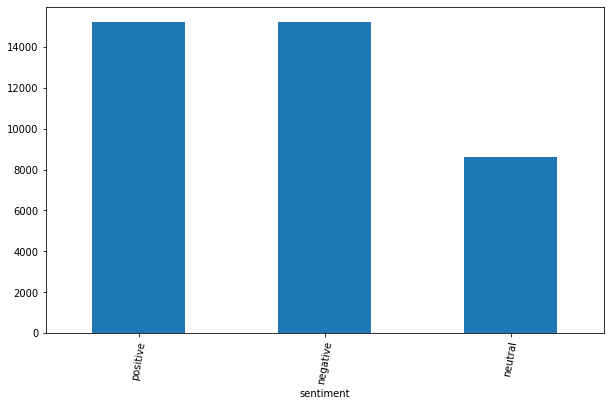

In [32]:
plt.subplots(figsize=(10,6))

dfnew.groupby('sentiment')['content'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

Because of the imbalance in the distribution and the low result in emotions data set, adding more labeled data could be helpful. This additional data have 15.000 datasets that have been preprocessed, filtered and cleaned in another notebook

In [33]:
dfadd = pd.read_csv('additionalclean.csv')

In [34]:
dfbig = pd.concat([dfnew, dfadd], ignore_index=True, sort =False)
dfbig.shape

(53432, 6)

In [35]:
dfbig.head()

,tweet_id,sentiment,author,content,Cleaned,Unnamed: 0
0,1.956968e+09,negative,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,layin n bed headache ughhhhwaitin call,NaN
1,1.956968e+09,negative,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,NaN
2,1.956968e+09,positive,czareaquino,wants to hang out with friends SOON!,wants hang friends soon,NaN
3,1.956968e+09,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",trade someone houston tickets,NaN
4,1.956968e+09,negative,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,repinging didnt go prom bc bf didnt friends,NaN


There is an extra column occured, needs to be dropped

In [36]:
dfbig = dfbig.drop(['Unnamed: 0'], axis=1)
# dfnew=dfbig
dfbig.head()

,tweet_id,sentiment,author,content,Cleaned
0,1.956968e+09,negative,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,layin n bed headache ughhhhwaitin call
1,1.956968e+09,negative,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
2,1.956968e+09,positive,czareaquino,wants to hang out with friends SOON!,wants hang friends soon
3,1.956968e+09,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",trade someone houston tickets
4,1.956968e+09,negative,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,repinging didnt go prom bc bf didnt friends


Now we can re-train our new and clean data set 

### Wordcloud

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud. We used Python wordcloud library

#### Positive

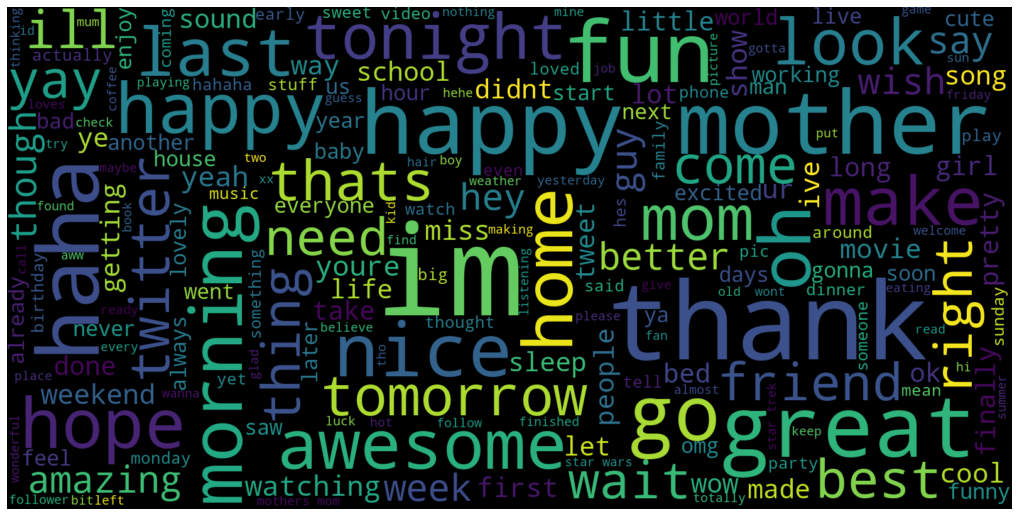

In [37]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='viridis').\
generate(dfnew[dfnew.sentiment=='positive'].Cleaned.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Wordcloud for the uncleaned text (original)

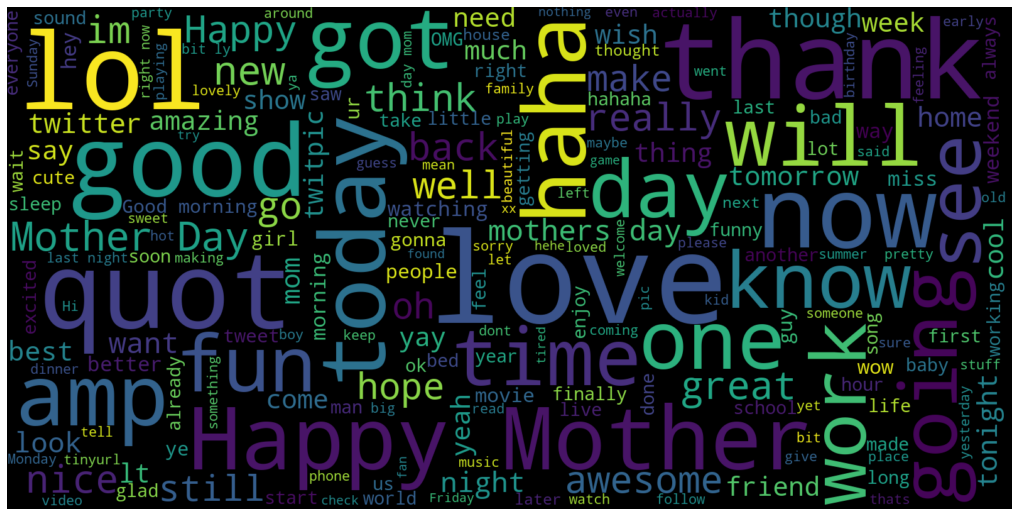

In [38]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='viridis').\
generate(dfnew[dfnew.sentiment=='positive'].content.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Neutral

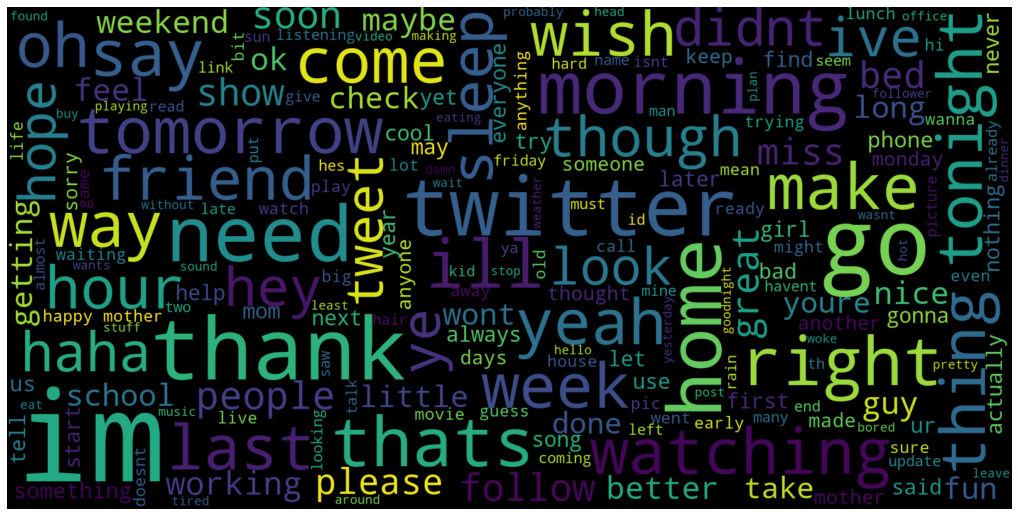

In [39]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='viridis').\
generate(dfnew[dfnew.sentiment=='neutral'].Cleaned.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

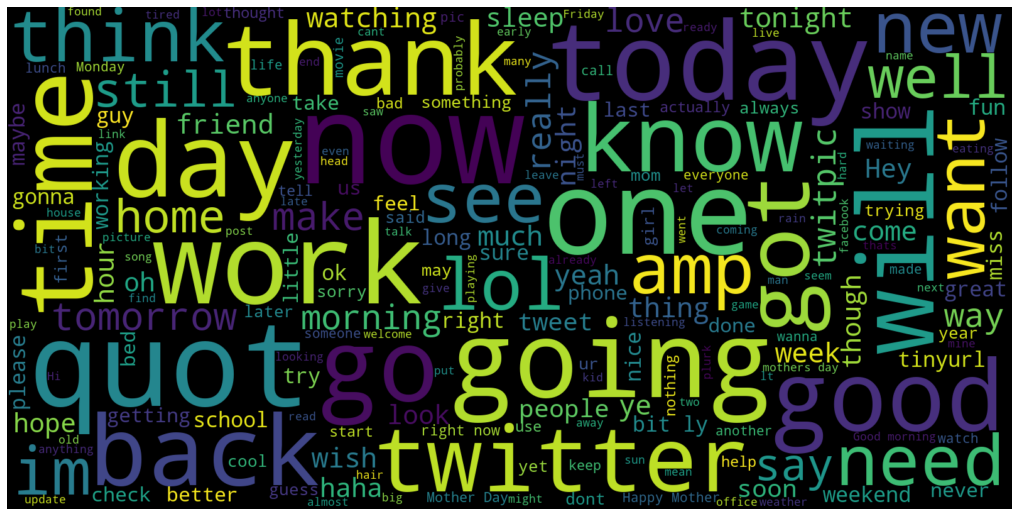

In [40]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='viridis').\
generate(dfnew[dfnew.sentiment=='neutral'].content.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Negative

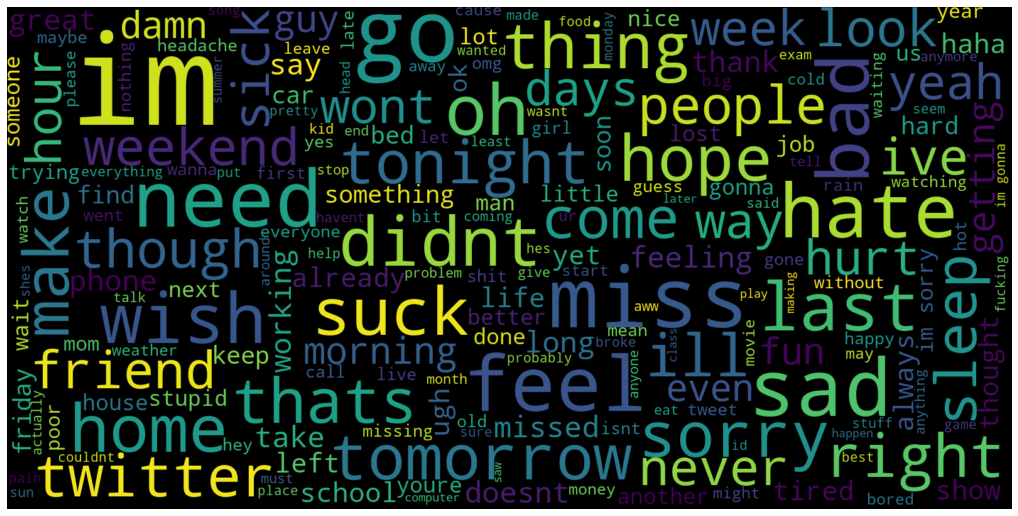

In [41]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='viridis').\
generate(dfnew[dfnew.sentiment=='negative'].Cleaned.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

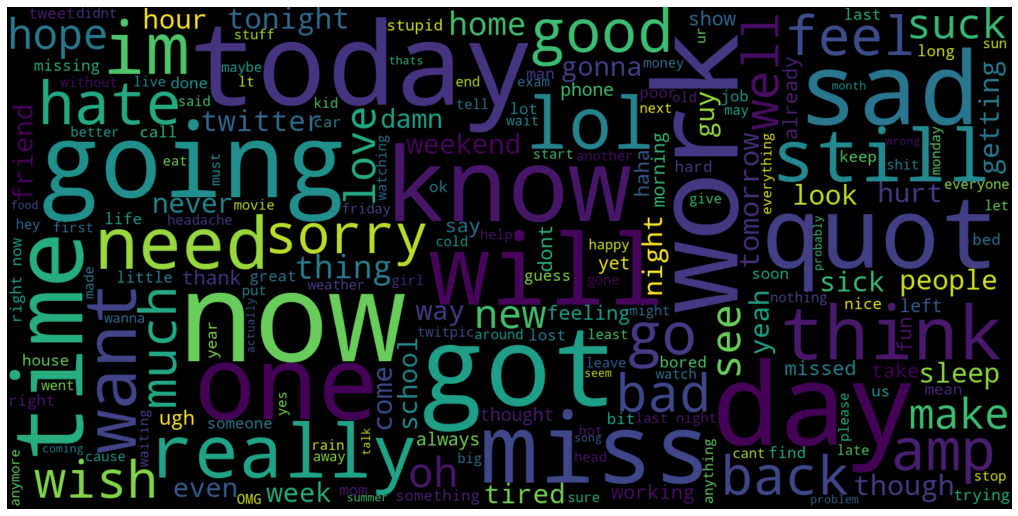

In [42]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='viridis').\
generate(dfnew[dfnew.sentiment=='negative'].content.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Lets apply tokenization and lemmatization after categorizing in 3 sentiments

In [43]:
dfnew.shape

(39005, 5)

In [44]:
wordnet_lemmatizer=WordNetLemmatizer()

dfmostc=dfnew.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if (k not in stop) and (k!='http' and k!='quot') ]]).most_common(20))

dfmostc

sentiment
negative    [(day, 1042), (get, 987), (go, 877), (like, 853), (work, 853), (got, 782), (today, 702), (going, 662), (ca, 632), (good, 631), (im, 620), (sad, 619), (miss, 609), (really, 605), (know, 587), (u, 5...
neutral     [(day, 425), (get, 392), (go, 381), (good, 351), (work, 350), (like, 343), (one, 330), (u, 320), (going, 312), (got, 310), (back, 289), (time, 283), (know, 283), (today, 279), (want, 225), (twitte...
positive    [(day, 1914), (love, 1286), (good, 1269), (happy, 1091), (mother, 887), (lol, 774), (like, 746), (u, 728), (got, 720), (get, 704), (thanks, 673), (time, 647), (today, 627), (go, 606), (great, 600)...
Name: content, dtype: object

Now lets see the distribution of most common tokens in each sentiment

In [45]:
dfnew=dfbig.copy()

### Lets try NLTK Vader for sentiment comparison

NLTK Vader is a parsimonious rule-based model for sentiment snalysis of social media text. With vader, we can compare our dataset's classification with the Vader classification

In [46]:

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Administrator/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
def sentiment_analyzer_scores(sentence):
    '''
    Evaluates polarity scores of a given sentence and prints the result.
    '''
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

analyzer = SentimentIntensityAnalyzer()

In [48]:

sentiments = []
compounds = []
sid = SentimentIntensityAnalyzer()
for i in dfnew.content:
    sentiment = sid.polarity_scores(i)
    if sentiment['compound']< -0.05:
        sentiments.append('negative')    
    elif sentiment['compound']> 0.05:
        sentiments.append('positive')
    else:
        sentiments.append('neutral')
    compounds.append(sentiment)
    
dfnew['vader'] = pd.DataFrame(sentiments)
dfnew['compound'] = compounds


In [49]:
dfnew.head(10)

,tweet_id,sentiment,author,content,Cleaned,vader,compound
0,1.956968e+09,negative,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,layin n bed headache ughhhhwaitin call,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,1.956968e+09,negative,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,negative,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}"
2,1.956968e+09,positive,czareaquino,wants to hang out with friends SOON!,wants hang friends soon,positive,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.5255}"
3,1.956968e+09,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",trade someone houston tickets,negative,"{'neg': 0.165, 'neu': 0.767, 'pos': 0.068, 'compound': -0.3919}"
4,1.956968e+09,negative,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,repinging didnt go prom bc bf didnt friends,negative,"{'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'compound': -0.5667}"
5,1.956968e+09,negative,ShansBee,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!",sleep im thinking old friend hes married damn wants scandalous,negative,"{'neg': 0.26, 'neu': 0.575, 'pos': 0.165, 'compound': -0.6458}"
6,1.956969e+09,negative,mcsleazy,Hmmm. http://www.djhero.com/ is down,hmmm,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
7,1.956969e+09,negative,nic0lepaula,@charviray Charlene my love. I miss you,charlene miss,positive,"{'neg': 0.163, 'neu': 0.408, 'pos': 0.429, 'compound': 0.5574}"
8,1.956969e+09,negative,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,im sorry least friday,negative,"{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.0772}"
9,1.956969e+09,neutral,feinyheiny,cant fall asleep,fall asleep,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [50]:
dfnew=dfnew[['tweet_id','author','content','Cleaned','sentiment','vader','compound']]
dfnew.head(20)

,tweet_id,author,content,Cleaned,sentiment,vader,compound
0,1.956968e+09,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,layin n bed headache ughhhhwaitin call,negative,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,1.956968e+09,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,negative,negative,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}"
2,1.956968e+09,czareaquino,wants to hang out with friends SOON!,wants hang friends soon,positive,positive,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.5255}"
3,1.956968e+09,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",trade someone houston tickets,neutral,negative,"{'neg': 0.165, 'neu': 0.767, 'pos': 0.068, 'compound': -0.3919}"
4,1.956968e+09,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,repinging didnt go prom bc bf didnt friends,negative,negative,"{'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'compound': -0.5667}"
5,1.956968e+09,ShansBee,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!",sleep im thinking old friend hes married damn wants scandalous,negative,negative,"{'neg': 0.26, 'neu': 0.575, 'pos': 0.165, 'compound': -0.6458}"
6,1.956969e+09,mcsleazy,Hmmm. http://www.djhero.com/ is down,hmmm,negative,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
7,1.956969e+09,nic0lepaula,@charviray Charlene my love. I miss you,charlene miss,negative,positive,"{'neg': 0.163, 'neu': 0.408, 'pos': 0.429, 'compound': 0.5574}"
8,1.956969e+09,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,im sorry least friday,negative,negative,"{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.0772}"
9,1.956969e+09,feinyheiny,cant fall asleep,fall asleep,neutral,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [51]:
for i in dfnew.index[0:10]:
    print(i)
    sentiment_analyzer_scores(dfnew.content[i])

0
Layin n bed with a headache  ughhhh...waitin on your call... {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1
Funeral ceremony...gloomy friday...----- {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}
2
wants to hang out with friends SOON!---- {'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.5255}
3
@dannycastillo We want to trade with someone who has Houston tickets, but no one will. {'neg': 0.165, 'neu': 0.767, 'pos': 0.068, 'compound': -0.3919}
4
Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends {'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'compound': -0.5667}
5
I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous! {'neg': 0.26, 'neu': 0.575, 'pos': 0.165, 'compound': -0.6458}
6
Hmmm. http://www.djhero.com/ is down---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
7
@charviray Charlene my love. I miss you- {'neg': 0.163, 'neu': 0.408, 'pos'

Let's compare the sentiments in our data and the 'Vader' results

In [52]:
(dfnew.sentiment==dfnew.vader).mean()

0.5442431501721815

In [53]:
dfnew[dfnew.sentiment!=dfnew.vader].sample(10)

,tweet_id,author,content,Cleaned,sentiment,vader,compound
38071,1.753758e+09,soniakd,summer clothes panic over..I see rain clouds !! still going swimming though..I'm feeling in a holiday mood,summer clothes panic overi rain clouds swimming thoughim feeling holiday mood,positive,negative,"{'neg': 0.157, 'neu': 0.617, 'pos': 0.227, 'compound': -0.1739}"
31501,1.752228e+09,PleaseSeeUs,@barrysma NEW motorcycle and you POPPED a cable already? wow-you ride HARD!,motorcycle popped cable already wowyou ride hard,positive,negative,"{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'compound': -0.3453}"
48537,5.698700e+17,681460859,@USAirways I've been on hold for 30 minutes and counting. #unacceptable,@user I've hold 30 minutes counting. #unacceptable,negative,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
26105,1.695512e+09,chriss_21,"@TennealMaree haha ofcoooursee you do, its pretty much a must, and pluss its dress up night, jst added incentive",haha ofcoooursee pretty must pluss dress jst added incentive,neutral,positive,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.8271}"
49058,5.695390e+17,681461384,@USAirways now in a black hole of your phone system,@user black hole phone system,negative,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
10253,1.962913e+09,JohnSeaborn,*sigh* Last day at work. I has an sadifying in my heartparts.,sigh last sadifying heartparts,negative,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
7709,1.961917e+09,terpsichore,We're dealing with Overactive Let-Down right now. http://bit.ly/9ydHU,dealing overactive letdown right,positive,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
43048,5.678460e+17,681454046,"@united On top of this, a CSR went ahead and hung up on me after I called United to discuss this.","@user On top this, CSR went ahead hung I called United discuss this.",negative,positive,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.5574}"
8961,1.962436e+09,sarahsosincere,"@hank1914 Hey, that link didn't work for me",hey link didnt,positive,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
11114,1.963192e+09,kurt_ctdk,"@STHLMBEAT yeah, I just realise the organiser dun let performing artist/djs drink on stage tight malaysian laws n rules here",yeah realise organiser dun let performing artistdjs drink stage tight malaysian laws n rules,neutral,positive,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.296}"


It looks like, our dataset's classification is better than vader's classification. On the other hand, it is obvious that (because twitter texts are very short) our common words cleaner cleaned more than needed. 

## Train-Test Split

In [54]:

X_train, X_test, y_train, y_test = train_test_split(dfnew['Cleaned'],
                                                    dfnew['sentiment'],
                                                    test_size=.25, random_state=53)

## Count Vectirizing

In [55]:
count_vect = CountVectorizer(min_df=0.001)
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [56]:
vocab = count_vect.get_feature_names()

In [57]:
pd.DataFrame(count_vect_train, columns=vocab).head(10)

,10,11,12,15,1st,20,200,24,25,2nd,...,you,youll,your,youre,youtube,youve,yr,yum,yummy,ûï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression

In [58]:

logreg_CV = LogisticRegression(random_state=0)
logreg_CV.fit(count_vect_train, y_train)
y_pred_lr_CV = logreg_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_CV))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy : 0.6158856116185057


##  Linear SVC

In [59]:

Lsvc = LinearSVC()

Lsvc.fit(count_vect_train, y_train)

pred= Lsvc.predict(count_vect_test)

metrics.accuracy_score(y_test, pred)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6156610270998653

## Naive Bayes

In [60]:

from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(count_vect_train, y_train)

pred = nb_classifier.predict(count_vect_test)

metrics.accuracy_score(y_test, pred)

0.566701602036233

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_CV = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced", n_estimators = 200)
rf_CV.fit(count_vect_train, y_train)
y_pred_rf_CV = rf_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_rf_CV))

Accuracy : 0.5810001497230124


## Gradient Boosting

In [62]:

xg_boost_CV = XGBClassifier()
xg_boost_CV.fit(count_vect_train, y_train)
y_pred_xg_boost = xg_boost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xg_boost))

Accuracy : 0.5488097020512053


## XGBOOST

In [63]:

xg_boost_CV = XGBClassifier()
xg_boost_CV.fit(count_vect_train, y_train)
y_pred_xg_boost = xg_boost_CV.predict(count_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_xg_boost))

Accuracy : 0.5488097020512053


## Tf-idf Vectorization¶

In [64]:
tfidf_vect = TfidfVectorizer(min_df=1, max_df=1.0, use_idf=True)
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
vocab = tfidf_vect.get_feature_names()
pd.DataFrame(np.round(tfidf_vect_train, 2), columns=vocab).head(10)

print('Longest word:', max(tfidf_vect.vocabulary_, key=len))

Longest word: imwatchingthehannahmoviewithmomshesaidthisfilmverygreat


It looks like, the reason for not having spaces between words is the user, lets check some random text

In [65]:
dfnew.sample(10)

,tweet_id,author,content,Cleaned,sentiment,vader,compound
19586,1.693976e+09,evadne,@ifixitlive Hey never realized that you also get a Twitter account. Your guides are truly many times a lifesaver to me.,hey never realized also twitter account guides truly many times lifesaver,negative,positive,"{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.7717}"
20688,1.694185e+09,GeorgeGuerra,@TangeloFlavored and no I didn't burn the eggs. We had a blast and the food was great all weekend. We had an awesome carne asada too.,didnt burn eggs blast food great weekend awesome carne asada,positive,positive,"{'neg': 0.07, 'neu': 0.669, 'pos': 0.261, 'compound': 0.7906}"
27690,1.696178e+09,miaww28,is enjoying the night with her folks.,enjoying folks,neutral,positive,"{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.5267}"
43825,5.696880e+17,681454833,@SouthwestAir especially if it's your mom! #IChangedYourDiaper,@user especially mom! #IChangedYourDiaper,neutral,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
39935,5.700040e+17,681449574,@united I am signed up for notifications. This is the first trip I was not updated on. Not sure why this happened.,@user I signed notifications. This first trip I updated on. Not sure happened.,negative,negative,"{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'compound': -0.2411}"
44030,5.694950e+17,681455043,@SouthwestAir i forgot to put my tsa pre number in before I checked in. It is now in my profile but will it be on my boarding pass in the am,@user forgot put tsa pre number I checked in. It profile boarding pass,neutral,neutral,"{'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'compound': 0.0387}"
24969,1.695137e+09,jehrhart,posting my first tweet!!,posting first tweet,neutral,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
44648,5.688280e+17,681455667,@SouthwestAir shhhh i don't want something else to steal our deal_Ù÷ä,@user shhhh want something else steal deal_Ù÷ä,positive,negative,"{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'compound': -0.5302}"
47439,5.682200e+17,681459427,"@JetBlue 1472, FLL to LGA. This is getting old. 4th @JetBlue flight in 2.5 weeks, 4th significant delay.","@user 1472, FLL LGA. This getting old. 4th @user flight 2.5 weeks, 4th significant delay.",negative,negative,"{'neg': 0.114, 'neu': 0.796, 'pos': 0.09, 'compound': -0.128}"
52073,5.699000e+17,681678425,"@AmericanAir confused at the definition of a ""preferred seat."" I paid extra for one and got a regular seat with no legroom. Unimpressed.","@user confused definition ""preferred seat."" I paid extra one got regular seat legroom. Unimpressed.",negative,negative,"{'neg': 0.289, 'neu': 0.711, 'pos': 0.0, 'compound': -0.7096}"


## Logreg after Tf-idf

In [66]:
logreg_TV = LogisticRegression(class_weight='balanced', random_state=5)
logreg_TV.fit(tfidf_vect_train, y_train)
y_pred_lr_TV = logreg_TV.predict(tfidf_vect_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr_TV))
print (classification_report(y_test, y_pred_lr_TV))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy : 0.618580625842192
              precision    recall  f1-score   support

    negative       0.71      0.72      0.72      6124
     neutral       0.43      0.41      0.42      2917
    positive       0.61      0.62      0.61      4317

    accuracy                           0.62     13358
   macro avg       0.58      0.58      0.58     13358
weighted avg       0.62      0.62      0.62     13358



## Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
cvresult = cross_val_score(logreg_CV, count_vect_train, y_train,cv=5)

print(cvresult)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[0.61115269 0.61726547 0.61801397 0.60975914 0.61662299]


### Pipeline

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)

print(text_clf.score(X_test, y_test))

0.5841443329839796


### Grid Search

In [69]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__stop_words': ['english', None],
    'vect__max_df': [0.7, 0.8, 0.9, 1.0],
    'vect__min_df': [10, .001, .01, 0.1],    
    'clf__alpha': (0.1, 1.0)
}

grid_search = GridSearchCV(text_clf, parameters, cv=3,
                           n_jobs=-1, verbose=1)

In [70]:
grid_search.fit(X_train, y_train)

print('score', grid_search.score(X_test, y_test))
print('-----')

print('GridSearchCV:')
y_pred = grid_search.predict(X_test)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:   28.8s finished


score 0.5946998053600838
-----
GridSearchCV:
Best score: 0.593
Best parameters set:
	clf__alpha: 1.0
	vect__max_df: 0.7
	vect__min_df: 10
	vect__stop_words: 'english'


## Applying Deep Learning

In [71]:

import keras
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(dfnew.Cleaned)


Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [72]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(dfnew.Cleaned)
X = pad_sequences(X)
print(X)

[[   0    0    0 ...  106  538   52]
 [   0    0    0 ...    0 1637  207]
 [   0    0    0 ...  669  147  111]
 ...
 [   0    0    0 ...  603  944  479]
 [   0    0    0 ... 1702    2   29]
 [   0    0    0 ...   42   55    4]]


In [73]:
Y = []
for val in dfnew.sentiment:
    if(val == 'positive'):
        Y.append([1,0,0])
    elif (val=='neutral'):
        Y.append([0,1,0])
    else:
        Y.append([0,0,1])
Y = np.array(Y)
print(Y)

[[0 0 1]
 [0 0 1]
 [1 0 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [74]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,Y,test_size=0.30)

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM

model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(LSTM(300, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(300, dropout=0.2, recurrent_dropout=0.2)`
  


In [76]:
model.fit(X_tr ,y_tr, epochs=5,verbose=2,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 336s - loss: 0.8706 - acc: 0.5974
Epoch 2/5
 - 333s - loss: 0.7893 - acc: 0.6472
Epoch 3/5
 - 333s - loss: 0.7533 - acc: 0.6618
Epoch 4/5
 - 333s - loss: 0.7174 - acc: 0.6812
Epoch 5/5
 - 333s - loss: 0.6860 - acc: 0.6964


In [77]:
print('test loss and test accuracy:', model.evaluate(X_ts,y_ts))

16030/16030 [==============================] - 44s 3ms/step
test loss and test accuracy: [0.8809923972551033, 0.6129756706027187]
